In [3]:
# DEPOLLUTION D'UN LAC
#
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Methode d'Euler explicite
#
def Euler_ex(f,Q,X0,dt,T):
    X=[X0]
    for i in range (int(T/dt)):
        X0=X0+dt*f(X0,Q)
        X.append(X0)
    return X

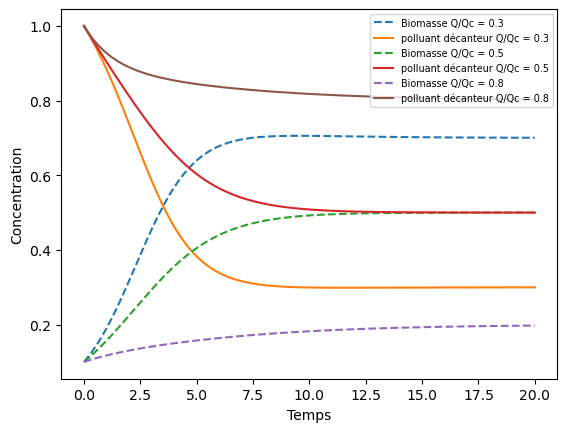

In [7]:
# Résolution du système rapide (dans le décanteur)
#
T,dt,mu,x0,zeta=20,0.02,1,0.1,1
def Fdepollrapide(X,Q):
    Z=np.array([mu*X[0]*X[1] - Q*X[0], Q*(zeta-X[1]) - mu*X[0]*X[1]])
    return Z
t=np.arange(0,T+dt,dt)
#
Débit=[0.3,0.5,0.8]
for q in Débit :
    X=np.array(Euler_ex(Fdepollrapide,q,[x0,zeta],dt,T))
    plt.plot(t,X[:,0],"--",label="Biomasse Q/Qc = "+str(q))
    plt.plot(t,X[:,1],label="polluant décanteur Q/Qc = "+str(q))
plt.legend(fontsize="x-small")
plt.xlabel('Temps')
plt.ylabel('Concentration')
plt.show()

**Optimisation du débit**

In [13]:
# recherche du min de la fonction T_obj par méthode de dichotomie appliquée à la dérivée de T_obj
#
dt,mu,eps,z0,z_obj=1,1,0.01,1,0.5
def phi(Q):
    return Q/mu
def T_obj(Q):
    return np.log((z0-phi(Q))/(z_obj-phi(Q)))/(eps*Q)
def Tobj_prime(Q):
    h=10**-5
    return (T_obj(Q+h)-T_obj(Q))/h
#
#
def dichotomie(f, a=0.1, b=0.9, epsilon=10**-5):
    m = (a + b)/2
    while abs(a - b) > epsilon:
        if f(m) == 0.:
            return m
        elif f(a)*f(m) > 0:
            a = m
        else:
            b = m
        m = (a + b)/2
    return m
print('débit optimal:')
print (dichotomie(Tobj_prime, a=0.1, b=0.4, epsilon=10**-5))

débit optimal:
0.3223403930664062


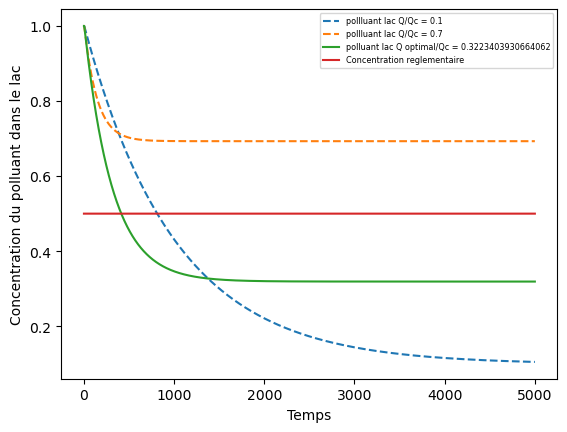

In [15]:
# Résolution du système complet (lac+décanteur)
#
T=5000
Débit=[0.1,0.7]
#Résomution de (2) avec schèma d'Euler explicite
def Fdepoll(X,Q):
    X1=mu*X[0]*X[1] - Q*X[0]
    X2=Q*(X[2]-X[1]) - mu*X[0]*X[1]
    X3=eps*Q*(X[1]-X[2])
    return np.array([X1,X2,X3])
t=np.arange(0,T+dt,dt)
for q in Débit :
    #Z(t) concentration du polluant ds le lac
    Z=np.array(Euler_ex(Fdepoll,q,np.array([x0,zeta,z0]),dt,T))[:,2]
    plt.plot(t,Z,"--",label="pollluant lac Q/Qc = "+str(q))
Qopt=dichotomie(Tobj_prime, a=0.1, b=0.4, epsilon=10**-5)
plt.plot(t,np.array(Euler_ex(Fdepoll,Qopt,np.array([0.1,1,z0]),dt,T))[:,2],label="polluant lac Q optimal/Qc = "+str(Qopt))
plt.plot(t,[z_obj]*len(t), label='Concentration reglementaire')
plt.legend(fontsize="xx-small")
plt.xlabel('Temps')
plt.ylabel('Concentration du polluant dans le lac')
plt.show()